## Part 2: Data Analysis & Modelling

### Data Preparation

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import statistics
from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


%matplotlib inline

In [2]:
#Load resale data

df = pd.read_csv('hdb_clean.csv')
df.sample(50)

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years
120942,1.376102,103.933867,761,PASIR RIS STREET 71,510761,761 PASIR RIS ST 71,13.80,1.75,2022-10,PASIR RIS,5 ROOM,761,PASIR RIS ST 71,07 TO 09,128.0,Improved,1996,625000.0,73 years,73
3853,1.330561,103.909839,114,BEDOK RESERVOIR ROAD,470114,114 BEDOK RESERVOIR RD,8.37,0.51,2019-05,BEDOK,EXECUTIVE,114,BEDOK RESERVOIR RD,04 TO 06,150.0,Maisonette,1985,660000.0,65 years 06 months,62
87058,1.321280,103.854938,97,WHAMPOA DRIVE,320097,97 WHAMPOA DR,4.25,0.78,2021-09,KALLANG/WHAMPOA,3 ROOM,97,WHAMPOA DR,07 TO 09,75.0,Improved,1980,360000.0,57 years 11 months,57
17798,1.293190,103.811253,59,STRATHMORE AVENUE,142059,59 STRATHMORE AVE,4.60,0.60,2019-09,QUEENSTOWN,4 ROOM,59,STRATHMORE AVE,01 TO 03,87.0,Model A,2000,590000.0,80 years 01 month,77
170720,1.328460,103.723288,138D,YUAN CHING ROAD,614138,138D YUAN CHING RD,15.11,1.77,2019-11,JURONG WEST,3 ROOM,138D,YUAN CHING RD,07 TO 09,67.0,DBSS,2014,440000.0,93 years 10 months,91
36863,1.344936,103.720025,517C,JURONG WEST STREET 52,643517,517C JURONG WEST ST 52,16.14,0.13,2016-08,JURONG WEST,4 ROOM,517C,JURONG WEST ST 52,13 TO 15,95.0,Model A,2000,540000.0,82,77
139406,1.431130,103.791950,535,WOODLANDS DRIVE 14,730535,535 WOODLANDS DR 14,17.66,0.41,2020-02,WOODLANDS,5 ROOM,535,WOODLANDS DR 14,01 TO 03,125.0,Premium Apartment,1999,410000.0,78 years 07 months,76
178380,1.386714,103.769773,428,BUKIT PANJANG RING ROAD,670428,428 BT PANJANG RING RD,14.62,1.25,2021-02,BUKIT PANJANG,5 ROOM,428,BT PANJANG RING RD,04 TO 06,129.0,Improved,1989,475000.0,67 years 09 months,66
131160,1.397018,103.897535,290C,COMPASSVALE CRESCENT,543290,290C COMPASSVALE CRES,13.62,0.63,2020-03,SENGKANG,5 ROOM,290C,COMPASSVALE CRES,01 TO 03,110.0,Improved,2001,418000.0,80 years 10 months,78
114001,1.318121,103.769088,344,CLEMENTI AVENUE 5,120344,344 CLEMENTI AVE 5,9.94,0.55,2018-10,CLEMENTI,2 ROOM,344,CLEMENTI AVE 5,10 TO 12,44.0,Improved,1979,220000.0,59 years 07 months,56


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184110 entries, 0 to 184109
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   latitude             184110 non-null  float64
 1   longitude            184110 non-null  float64
 2   blk_no               184110 non-null  object 
 3   road_name            184110 non-null  object 
 4   postal_code          184110 non-null  object 
 5   address              184110 non-null  object 
 6   cbd_dist             184110 non-null  float64
 7   min_dist_mrt         184110 non-null  float64
 8   month                184110 non-null  object 
 9   town                 184110 non-null  object 
 10  flat_type            184110 non-null  object 
 11  block                184110 non-null  object 
 12  street_name          184110 non-null  object 
 13  storey_range         184110 non-null  object 
 14  floor_area_sqm       184110 non-null  float64
 15  flat_model       

In [4]:
df['month'] = pd.to_datetime(df['month'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184110 entries, 0 to 184109
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   latitude             184110 non-null  float64       
 1   longitude            184110 non-null  float64       
 2   blk_no               184110 non-null  object        
 3   road_name            184110 non-null  object        
 4   postal_code          184110 non-null  object        
 5   address              184110 non-null  object        
 6   cbd_dist             184110 non-null  float64       
 7   min_dist_mrt         184110 non-null  float64       
 8   month                184110 non-null  datetime64[ns]
 9   town                 184110 non-null  object        
 10  flat_type            184110 non-null  object        
 11  block                184110 non-null  object        
 12  street_name          184110 non-null  object        
 13  storey_range  

In [6]:
# Load and merge CPI data

cpi = pd.read_csv('hdb_cpi.csv')
cpi['month'] = pd.to_datetime(cpi['month'], format='%Y %b')

df = df.merge(cpi, on='month', how='left') 
df['real_price'] = (df['resale_price'] / df['cpi']) * 100 

In [7]:
df.sample(10)

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years,cpi,real_price
84955,1.374484,103.882442,662,HOUGANG AVENUE 4,530662,662 HOUGANG AVE 4,10.69,1.16,2015-05-01,HOUGANG,...,HOUGANG AVE 4,04 TO 06,74.0,Model A,1987,313888.0,71,64,110.091,285116.857872
107931,1.345128,103.703897,678B,JURONG WEST STREET 64,642678,678B JURONG WEST ST 64,17.78,0.76,2018-09-01,JURONG WEST,...,JURONG WEST ST 64,01 TO 03,90.0,Premium Apartment,2008,323000.0,88 years 10 months,85,101.889,317011.649933
154676,1.394610,103.876586,434B,FERNVALE ROAD,792434,434B FERNVALE RD,12.66,2.13,2017-05-01,SENGKANG,...,FERNVALE RD,16 TO 18,94.0,Premium Apartment,2013,435000.0,95 years 01 month,90,103.197,421523.881508
117216,1.334821,103.855273,36,LORONG 5 TOA PAYOH,310036,36 LOR 5 TOA PAYOH,5.75,0.89,2017-12-01,TOA PAYOH,...,LOR 5 TOA PAYOH,13 TO 15,102.0,Model A,1997,620000.0,78 years 09 months,74,101.479,610963.844736
117277,1.334618,103.880165,10,JOO SENG ROAD,360010,10 JOO SENG RD,6.55,0.87,2018-08-01,TOA PAYOH,...,JOO SENG RD,13 TO 15,119.0,Improved,1983,555000.0,63 years 08 months,60,102.012,544053.640748
48316,1.329410,103.935397,139,BEDOK NORTH AVENUE 3,460139,139 BEDOK NTH AVE 3,10.67,0.87,2017-03-01,BEDOK,...,BEDOK NTH AVE 3,01 TO 03,117.0,Standard,1979,538000.0,60 years 10 months,56,103.449,520063.026225
131506,1.357992,103.936892,708,TAMPINES STREET 71,520708,708 TAMPINES ST 71,12.63,1.39,2020-09-01,TAMPINES,...,TAMPINES ST 71,04 TO 06,101.0,Model A,1997,420000.0,75 years 10 months,74,99.869,420550.921707
98868,1.311043,103.851661,15,FARRER PARK ROAD,210015,15 FARRER PK RD,3.10,0.22,2021-08-01,KALLANG/WHAMPOA,...,FARRER PK RD,16 TO 18,62.0,Model A,2004,516000.0,81 years 10 months,81,NaN,NaN
112367,1.368375,103.849151,343,ANG MO KIO AVENUE 3,560343,343 ANG MO KIO AVE 3,9.44,0.18,2021-06-01,ANG MO KIO,...,ANG MO KIO AVE 3,10 TO 12,73.0,New Generation,1978,362000.0,55 years 11 months,55,NaN,NaN
172400,1.404885,103.896351,260B,PUNGGOL WAY,822260,260B PUNGGOL WAY,14.38,1.46,2021-01-01,PUNGGOL,...,PUNGGOL WAY,07 TO 09,113.0,Improved,2016,610000.0,94 years 06 months,93,NaN,NaN


In [8]:
#Check for null values

df.isnull().sum()

latitude                   0
longitude                  0
blk_no                     0
road_name                  0
postal_code                0
address                    0
cbd_dist                   0
min_dist_mrt               0
month                      0
town                       0
flat_type                  0
block                      0
street_name                0
storey_range               0
floor_area_sqm             0
flat_model                 0
lease_commence_date        0
resale_price               0
remaining_lease            0
lease_remain_years         0
cpi                    66610
real_price             66610
dtype: int64

In [9]:
df['real_price'] = df['real_price'].fillna(df.pop('resale_price'))
df = df.drop('cpi', axis=1)

In [10]:
# Create function for median value for storey_range

def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median

In [11]:
df['storey_median'] = df['storey_range'].apply(lambda x: get_median(x))
df.sample(10)

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,lease_remain_years,real_price,storey_median
81150,1.379328,103.836736,606,ANG MO KIO AVENUE 5,560606,606 ANG MO KIO AVE 5,10.77,0.95,2021-11-01,ANG MO KIO,...,606,ANG MO KIO AVE 5,07 TO 09,67.0,New Generation,1980,57 years 08 months,57,345000.000000,8.0
19732,1.386551,103.906741,122,SENGKANG EAST WAY,540122,122 SENGKANG EAST WAY,13.01,1.38,2018-12-01,SENGKANG,...,122,SENGKANG EAST WAY,10 TO 12,110.0,Improved,2000,80 years 08 months,77,374004.704585,11.0
160284,1.399309,103.900792,209C,PUNGGOL PLACE,823209,209C PUNGGOL PL,13.99,1.03,2019-11-01,PUNGGOL,...,209C,PUNGGOL PL,10 TO 12,67.0,Model A,2014,94 years 01 month,91,358522.885711,11.0
3451,1.336582,103.936707,774,BEDOK RESERVOIR VIEW,470774,774 BEDOK RESERVOIR VIEW,11.20,0.50,2017-08-01,BEDOK,...,774,BEDOK RESERVOIR VIEW,04 TO 06,115.0,Premium Apartment,2000,82 years 04 months,77,524034.481079,5.0
10515,1.308945,103.883530,28,CASSIA CRESCENT,391028,28 CASSIA CRES,4.59,0.32,2017-11-01,GEYLANG,...,28,CASSIA CRES,16 TO 18,101.0,Model A,1998,79 years 08 months,75,738163.339526,17.0
172764,1.379323,103.904191,477C,UPPER SERANGOON VIEW,533477,477C UPP SERANGOON VIEW,12.17,1.29,2022-01-01,HOUGANG,...,477C,UPP SERANGOON VIEW,07 TO 09,92.0,Premium Apartment,2016,93 years 03 months,93,567888.000000,8.0
139882,1.281153,103.828856,129,KIM TIAN ROAD,160129,129 KIM TIAN RD,2.51,0.58,2020-06-01,BUKIT MERAH,...,129,KIM TIAN RD,16 TO 18,88.0,Improved,1976,54 years 08 months,53,492601.032969,17.0
132382,1.327692,103.940764,79,BEDOK NORTH ROAD,460079,79 BEDOK NTH RD,11.12,0.60,2015-12-01,BEDOK,...,79,BEDOK NTH RD,04 TO 06,91.0,New Generation,1978,61,55,353897.036344,5.0
150352,1.417901,103.831345,804,YISHUN RING ROAD,760804,804 YISHUN RING RD,15.08,0.19,2020-08-01,YISHUN,...,804,YISHUN RING RD,04 TO 06,122.0,Improved,1987,65 years 06 months,64,490741.018939,5.0
170845,1.407590,103.910924,672D,EDGEFIELD PLAINS,824672,672D EDGEFIELD PLAINS,15.29,0.82,2020-03-01,PUNGGOL,...,672D,EDGEFIELD PLAINS,07 TO 09,90.0,Model A,2015,94 years 09 months,92,416976.917349,8.0


In [12]:
# Create df for required variables
df_resale = df[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','real_price']]
df_resale.sample(5)

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,real_price
124838,16.64,0.58,106.0,73,8.0,348381.895658
139045,10.15,2.12,119.0,74,2.0,464263.288515
175569,15.02,1.21,112.0,93,8.0,648000.000000
173238,14.95,1.17,93.0,93,8.0,401970.162620
53913,15.34,0.97,61.0,51,5.0,244193.145150


In [13]:
# Remove duplicates
df_resale = df_resale.drop_duplicates()
df_resale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182962 entries, 0 to 184109
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   cbd_dist            182962 non-null  float64
 1   min_dist_mrt        182962 non-null  float64
 2   floor_area_sqm      182962 non-null  float64
 3   lease_remain_years  182962 non-null  int64  
 4   storey_median       182962 non-null  float64
 5   real_price          182962 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 9.8 MB


In [14]:
df_resale.dtypes

cbd_dist              float64
min_dist_mrt          float64
floor_area_sqm        float64
lease_remain_years      int64
storey_median         float64
real_price            float64
dtype: object

### Data Visualisation

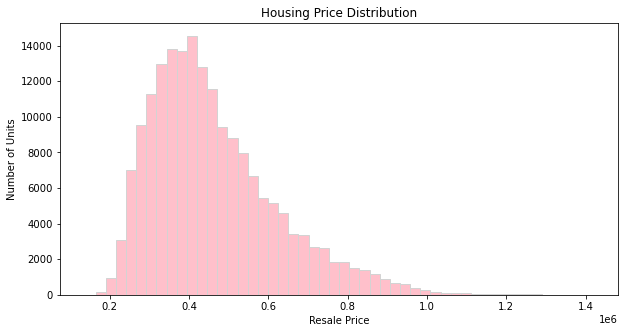

In [15]:
# Overall Sales

plt.figure(figsize = (10,5))
plt.hist(df_resale['real_price'], bins =50, color ='pink', ec = 'lightgrey')
plt.title('Housing Price Distribution')
plt.xlabel('Resale Price')
plt.ylabel('Number of Units')
plt.show()

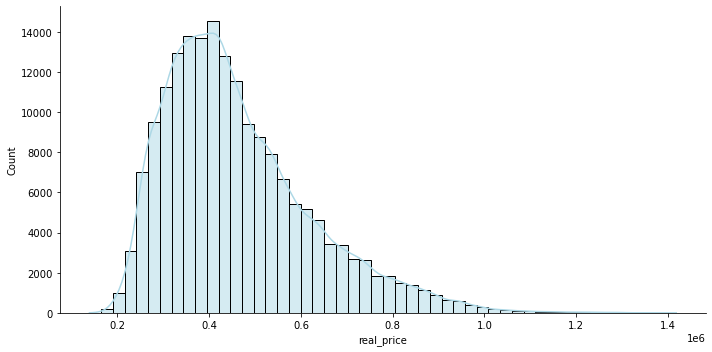

In [16]:
# Sales distribution

sns.displot(df_resale['real_price'], bins = 50, kind = 'hist', kde = True, aspect = 2, color = 'lightblue')
plt.show()

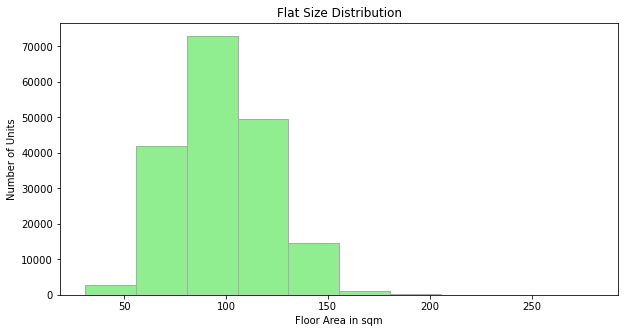

In [17]:
# Flat Size Distribution

plt.figure(figsize = (10,5))
plt.hist(df_resale['floor_area_sqm'], color ='lightgreen', ec = 'darkgrey')
plt.title('Flat Size Distribution')
plt.xlabel('Floor Area in sqm')
plt.ylabel('Number of Units')
plt.show()

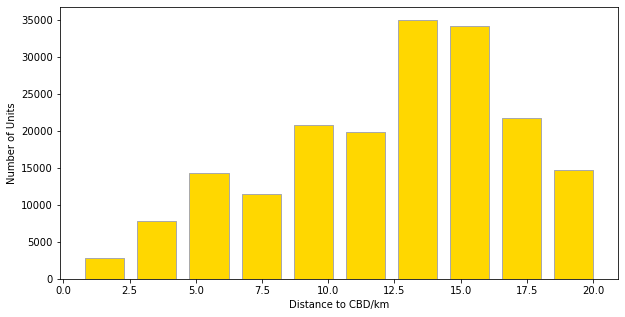

In [18]:
# Distance to CBD

plt.figure(figsize = (10,5))
plt.hist(df_resale['cbd_dist'], bins = 10, color ='gold', ec = 'darkgrey', rwidth = 0.75)
plt.xlabel('Distance to CBD/km')
plt.ylabel('Number of Units')
plt.show()

### Correlations

In [19]:
df_resale.corr()

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,real_price
cbd_dist,1.000000,0.163084,0.256053,0.304859,-0.165350,-0.253586
min_dist_mrt,0.163084,1.000000,0.024867,0.258507,0.032312,-0.097243
floor_area_sqm,0.256053,0.024867,1.000000,0.176959,-0.000551,0.607841
lease_remain_years,0.304859,0.258507,0.176959,1.000000,0.278687,0.375042
storey_median,-0.165350,0.032312,-0.000551,0.278687,1.000000,0.367004
real_price,-0.253586,-0.097243,0.607841,0.375042,0.367004,1.000000


In [20]:
#Filtering the array 

mask = np.zeros_like(df_resale.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

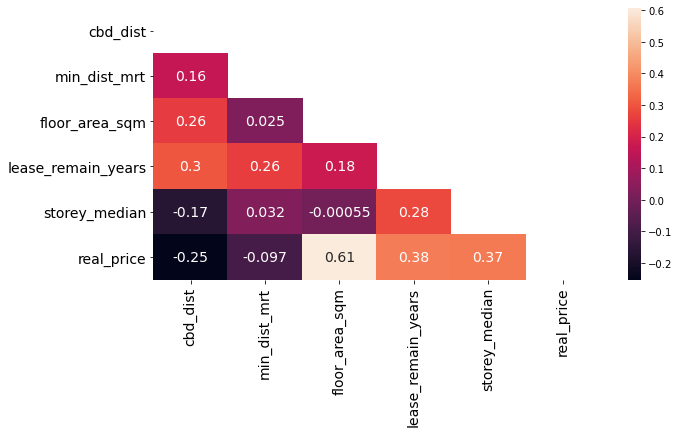

In [21]:
# Plot heatmap; use mask argument to filter out duplicates

plt.figure(figsize = (10,5))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
sns.heatmap(df_resale.corr(), mask = mask, annot = True, annot_kws = {'size': 14}) 
plt.show()

### Model A: Linear Regression

In [22]:
prices = df_resale['real_price']
features = df_resale.drop('real_price', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

print('Intercept:', lr.intercept_)
print('Training Data CV score:', np.mean(cross_val_score(lr, x_train, y_train, cv=5)))
print('Test Data CV score:', np.mean(cross_val_score(lr, x_test, y_test, cv=5))) 

Intercept: -92426.29512044974
Training Data CV score: 0.7572780010409952
Test Data CV score: 0.7605403330008705


### Model B: KNN Regressor

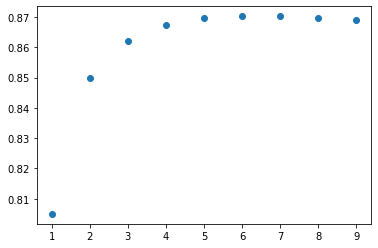

In [23]:
#Obtain optimal k value

cv_score=[]
for i in range(1,10):
    knn = KNeighborsRegressor(n_neighbors= i)
    cv_score.append(np.mean(cross_val_score(knn,x_train,y_train,cv=5)))
    x = range(1,10)
plt.scatter(x,cv_score)
plt.show()

In [24]:
knn = KNeighborsRegressor(n_neighbors= 6)
knn.fit(x_train, y_train)
print('Training Data CV score:', np.mean(cross_val_score(knn, x_train, y_train, cv=5)))
print('Test Data CV score:', np.mean(cross_val_score(knn, x_test, y_test, cv=5))) 

Training Data CV score: 0.8702351553009325
Test Data CV score: 0.8403001375540551


### Model C: Decision Tree Regressor

In [25]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
print('Training Data CV score:', np.mean(cross_val_score(dtr, x_train, y_train, cv=5)))
print('Test Data CV score:', np.mean(cross_val_score(dtr, x_test, y_test, cv=5))) 

Training Data CV score: 0.8335274863736784
Test Data CV score: 0.8004281946476495


### Model D: Random Forest Regressor

In [26]:
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(x_train, y_train)
print('Training Data CV score:', np.mean(cross_val_score(rf, x_train, y_train, cv=5)))
print('Test Data CV score:', np.mean(cross_val_score(rf, x_test, y_test, cv=5))) 

Training Data CV score: 0.8738728091869676
Test Data CV score: 0.8687064530250164


Feature: 0, Score: 0.29252
Feature: 1, Score: 0.04644
Feature: 2, Score: 0.48864
Feature: 3, Score: 0.13949
Feature: 4, Score: 0.03291


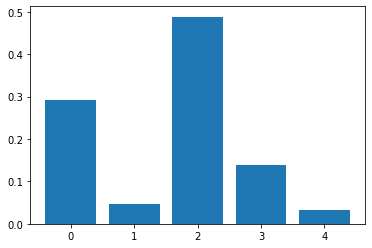

In [27]:
# Obtain Feature Importance

importance = rf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Valuation of Resale Unit

In [28]:
# Verify Features

features.sample(10)

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median
105533,15.02,0.56,110.0,79,14.0
43431,5.37,0.66,65.0,49,8.0
142095,13.12,0.40,93.0,61,2.0
125155,6.23,0.16,56.0,46,8.0
168911,16.26,1.04,96.0,93,11.0
26490,16.00,0.37,104.0,62,8.0
51069,17.48,0.85,110.0,79,5.0
150217,12.39,0.56,110.0,78,5.0
19325,12.41,0.66,92.0,88,14.0
44235,17.58,0.66,89.0,76,11.0


In [29]:
# Create and fit model

model = RandomForestRegressor(n_estimators = 10).fit(x_train, y_train)
pred = model.predict(x_train)
model_mse = mean_squared_error(y_train, pred)
model_rmse = np.sqrt(model_mse)

In [30]:
# Function for valuation 

def resale_estimate (cbd_dist, min_dist_mrt, floor_area_sqm, lease_remain_years, storey_median, high_confidence = True):
    
    features_new = [[cbd_dist, min_dist_mrt, floor_area_sqm, lease_remain_years, storey_median]]
    prediction = model.predict(features_new)
    
      # Calculate prediction interval
    if high_confidence:
        upper_bound = prediction + 2*model_rmse
        lower_bound = prediction - 2*model_rmse
        interval = 95
    else:
        upper_bound = prediction + model_rmse
        lower_bound = prediction - model_rmse
        interval = 68
    
    return round(prediction[0], 2), round(upper_bound[0], 2), round(lower_bound[0], 2), interval

In [31]:
resale_estimate(23, 0.5, 91, 61, 11, high_confidence =True)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


(330688.73, 401517.23, 259860.23, 95)

In [32]:
# Export new CSV file

df.to_csv('hdb_real.csv', index = False)